In [2]:
# Import necessary packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Define color palette
sns.set(color_codes=True, style="white", context="talk", font_scale=1.5)
PALETTE = sns.color_palette("Set1")
sns.set_palette(PALETTE[1:5] + PALETTE[6:], n_colors=9)

def load_result(filename):
    """
    Loads results from specified file
    """
    input = open(filename, "r")
    lines = input.readlines()
    ls = []
    for line in lines:
        ls.append(float(line.strip()))
    return ls


def produce_mean(ls):
    """
    Produces means from list of 8 results
    """
    ls_space = []
    for i in range(int(len(ls) / 8)):
        l = ls[i * 8 : (i + 1) * 8]
        ls_space.append(l)

    return np.mean(ls_space, axis=0)


# Load 3-classes accuracies
acc_3 = [
    load_result("3_class/naive_rf.txt"),
    load_result("3_class/cnn32.txt"),
    load_result("3_class/cnn32_2l.txt"),
    load_result("3_class/cnn32_5l.txt"),
    load_result("3_class/resnet18.txt"),
    load_result("3_class/svm.txt"),
]

# Load 8-classes results
acc_8 = [
    load_result("8_class/naive_rf.txt"),
    load_result("8_class/cnn32.txt"),
    load_result("8_class/cnn32_2l.txt"),
    load_result("8_class/cnn32_5l.txt"),
    load_result("8_class/resnet18.txt"),
    load_result("8_class/svm.txt"),
]

time_3 = [
    load_result("3_class/naive_rf_time.txt"),
    load_result("3_class/cnn32_time.txt"),
    load_result("3_class/cnn32_2l_time.txt"),
    load_result("3_class/cnn32_5l_time.txt"),
    load_result("3_class/resnet18_time.txt"),
    load_result("3_class/svm_time.txt"),
]

time_8 = [
    load_result("8_class/naive_rf_time.txt"),
    load_result("8_class/cnn32_time.txt"),
    load_result("8_class/cnn32_2l_time.txt"),
    load_result("8_class/cnn32_5l_time.txt"),
    load_result("8_class/resnet18_time.txt"),
    load_result("8_class/svm_time.txt"),
]

accs = [acc_3, acc_8, time_3, time_8]

def plot_acc(col, accs, pos):

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="RF",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN32_1L",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][5]),
            linewidth=5,
            color="#984ea3",
            label="SVM",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][2]),
            linewidth=5,
            color="#377eb8",
            linestyle="dashed",
            label="CNN32_2L",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][4]),
            linewidth=5,
            color="#4daf4a",
            label="Resnet18",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][3]),
            linewidth=5,
            color="#377eb8",
            linestyle="dotted",
            label="CNN32_5L",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][4]),
            linewidth=5,
            color="#4daf4a",
        )

        col.plot(
            samples_space,
            produce_mean(accs[pos][2]),
            linewidth=5,
            color="#377eb8",
            linestyle="dashed",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][5]),
            linewidth=5,
            color="#984ea3",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][3]),
            linewidth=5,
            color="#377eb8",
            linestyle="dotted",
        )
        

In [16]:
rf_means_3 = produce_mean(accs[2][0])[2:]
print(rf_means_3)

[0.42664519 0.42873425 0.53745547 0.95522381 2.36490941 6.8413243 ]


In [24]:
samples_space = np.geomspace(10, 10000, num=8, dtype=int)
np.polyfit(samples_space[2:], produce_mean(accs[2][5])[2:], 2)

array([ 2.10833585e-06,  1.03301244e-02, -6.53969538e-01])

In [17]:
np.polyfit([i * np.log(i) for i in samples_space[3:]], produce_mean(accs[2][0])[3:], 1)

array([7.08428437e-05, 2.83740210e-01])

In [29]:
samples_space2

array([     10,      35,     129,     464,    1668,    5994,   21544,
         77426,  278255, 1000000])

In [40]:
[-.53969538e-01 + 1.03301244e-02*i + 2.10833585e-06 * i ** 2 for i in samples_space2]
for i in samples_space2:
    print(i, 1.03301244e-02*i, " ", float(2.10833585e-06) * (float(i) * i))
print(samples_space2)

10 0.103301244   0.000210833585
35 0.36155435399999997   0.00258271141625
129 1.3325860476   0.03508481687985
464 4.7931777216   0.4539162751616
1668 17.2306474992   5.8658626019304
5994 61.9187656536   75.7483663188906
21544 222.5522000736   978.5712998289056
77426 799.8202117943999   12639.021132110114
278255 2874.408764922   163239.68478275166
1000000 10330.124399999999   2108335.85
[     10      35     129     464    1668    5994   21544   77426  278255
 1000000]


In [34]:
1000000 ** 2 * 2.10833585e-06

2108335.85

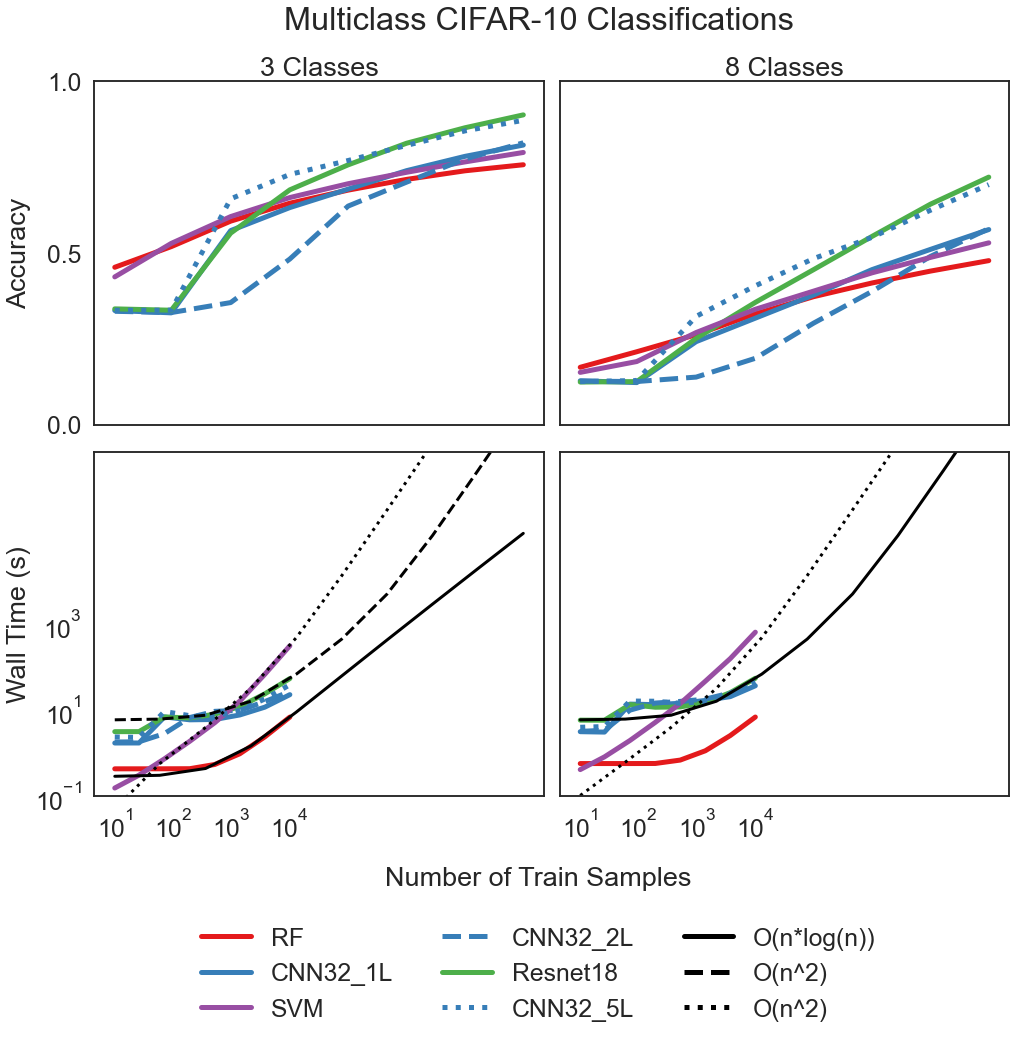

In [42]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 11), constrained_layout=True)

plt.suptitle("Multiclass CIFAR-10 Classifications", x=0.53, y=1.03, va="baseline")
fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
samples_space = np.geomspace(10, 10000, num=8, dtype=int)
xtitles = ["3 Classes", "8 Classes"]
ytitles = ["Accuracy", "Wall Time (s)"]
ylimits = [[0, 1], [1e-1, 1e7]]
yticks = [[0, 0.5, 1], [1e-1, 1e1, 1e3]]

for i, row in enumerate(ax):
    for j, col in enumerate(row):
        count = 2 * i + j
        col.set_xscale("log")
        col.set_ylim(ylimits[i])

        # Label x axis and plot figures
        if count < 2:
            col.set_xticks([])
            col.set_title(xtitles[j])
            plot_acc(col, accs, j)
        else:
            col.set_xticks([1e1, 1e2, 1e3, 1e4])
            col.set_yscale("log")
            plot_acc(col, accs, j + 2)

        # Label y axis
        if count % 2 == 0:
            col.set_yticks(yticks[i])
            col.set_ylabel(ytitles[i])
        else:
            col.set_yticks([])

samples_space2 = np.geomspace(10, 100000000, num=10, dtype=int)             
ax[1][0].plot(samples_space2, [2.83740210e-01 + 7.08428437e-05 * i * np.log(i) for i in samples_space2], label='O(n*log(n))', color='black', linewidth=3)
#ax[1][1].plot(samples_space2, [max(.5, i * np.log(i) / 10000) for i in samples_space], color='black', linewidth=3, linestyle="dashed")  
            
ax[1][0].plot(samples_space2, [5.85646094 + 4.68334474e-03*i + 1.33131033e-08 * (float(i)  ** 2) for i in samples_space2], label='O(n^2)', color='black', linewidth=3, linestyle="dashed")
ax[1][1].plot(samples_space2, [5.85646094 + 4.68334474e-03*i + 1.33131033e-08 * (float(i)  ** 2) for i in samples_space2], color='black', linewidth=3)

ax[1][0].plot(samples_space2, [-.53969538e-01 + 1.03301244e-02*i + 2.10833585e-06 * (float(i)  ** 2) for i in samples_space2], label='O(n^2)', color='black', linewidth=3, linestyle="dotted")
ax[1][1].plot(samples_space2, [-3.48115993e-05 + 1.01636959e-02*i + 2.12206538e-06 * (float(i) ** 2) for i in samples_space2], color='black', linewidth=3, linestyle="dotted")  

fig.align_ylabels(ax[:, ])

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.25),
    bbox_transform=plt.gcf().transFigure,
    ncol=3,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)